In [1]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

In [2]:
DATASET = r"C:\code-tomato\tomato\train"
DATASET2 = r"C:\code-tomato\tomato\valid"

In [3]:
CATEGORIES = ["Bacterial_spot", "Early_blight",
              "healthy", "Late_blight",
              "Leaf_Mold", "Septoria_leaf_spot",
              "Spider_mites",
              "Target_Spot", "mosaic_virus",
              "Yellow_Leaf_Curl_Virus"]

train_data = []

In [4]:
for category in CATEGORIES:
    label = CATEGORIES.index(category)
    path = os.path.join(DATASET, category)
    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, (256, 256))
        train_data.append([img, label])

In [5]:
test_data = []

for category in CATEGORIES:
    label = CATEGORIES.index(category)
    path = os.path.join(DATASET2, category)
    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, (256, 256))
        test_data.append([img, label])

In [6]:
random.shuffle(train_data)
random.shuffle(test_data)

X_train = []
y_train = []

In [7]:
for features, label in train_data:
    X_train.append(features)
    y_train.append(label)

In [8]:
X_test = []
y_test = []

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

In [9]:
X_train = np.array(X_train).reshape(-1, 256, 256, 3)
# X_train = X_train / 255.0

X_test = np.array(X_test).reshape(-1, 256, 256, 3)
# X_test = X_test / 255.0

one_hot_train = to_categorical(y_train)
one_hot_test = to_categorical(y_test)

In [10]:
classifier = Sequential()

classifier.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
classifier.add(tf.keras.layers.Dropout(0.4))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(activation='relu', units=64))
classifier.add(tf.keras.layers.Dense(activation='relu', units=128))
classifier.add(tf.keras.layers.Dense(activation='relu', units=64))
classifier.add(tf.keras.layers.Dense(activation='softmax', units=10))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [12]:
hist = classifier.fit(X_train, one_hot_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
115/115 [==============================] - 2584s 22s/step - loss: 20.3940 - accuracy: 0.1514 - val_loss: 2.1654 - val_accuracy: 0.2200
Epoch 2/50
115/115 [==============================] - 2338s 20s/step - loss: 2.0880 - accuracy: 0.2376 - val_loss: 2.0539 - val_accuracy: 0.2537
Epoch 3/50
115/115 [==============================] - 1454s 13s/step - loss: 1.8941 - accuracy: 0.3169 - val_loss: 1.8136 - val_accuracy: 0.3426
Epoch 4/50
115/115 [==============================] - 2325s 20s/step - loss: 1.7071 - accuracy: 0.3824 - val_loss: 1.7346 - val_accuracy: 0.3769
Epoch 5/50
115/115 [==============================] - 1534s 13s/step - loss: 1.5548 - accuracy: 0.4510 - val_loss: 1.6432 - val_accuracy: 0.4282
Epoch 6/50
115/115 [==============================] - 1975s 17s/step - loss: 1.4103 - accuracy: 0.5005 - val_loss: 1.4781 - val_accuracy: 0.4745
Epoch 7/50
115/115 [==============================] - 1972s 17s/step - loss: 1.2118 - accuracy: 0.5740 - val_loss: 1.2827 - val_a

In [13]:
test_loss, test_acc = classifier.evaluate(X_test, one_hot_test)
test_loss, test_acc

144/144 [==============================] - 134s 907ms/step - loss: 0.9809 - accuracy: 0.8098


(0.9809378385543823, 0.8098146319389343)

In [14]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

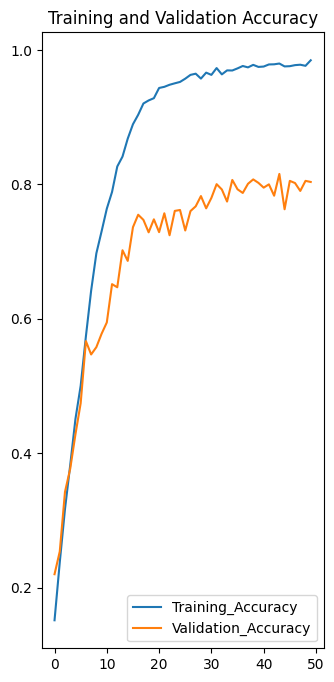

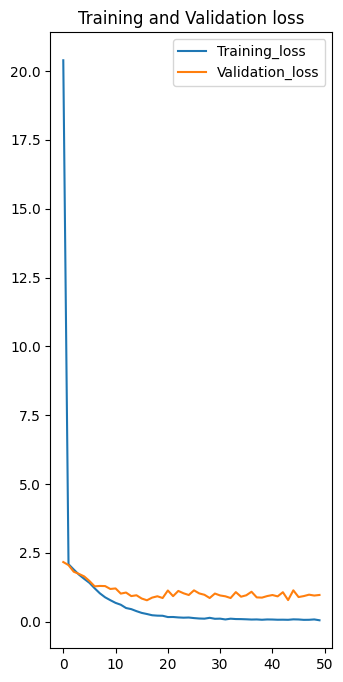

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(range(50), acc, label='Training_Accuracy')
plt.plot(range(50), val_acc, label='Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), loss, label='Training_loss')
plt.plot(range(50), val_loss, label='Validation_loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

In [78]:
IMAGE_SIZE =64
BATCH_SIZE = 32
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    "tomato/train",
    shuffle=True,
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 1
)

Found 18345 files belonging to 10 classes.


In [79]:
dataset_valid = tf.keras.preprocessing.image_dataset_from_directory(
    "tomato/valid",
    shuffle=True,
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 1
)
class_names = dataset_valid.class_names
class_names

Found 4585 files belonging to 10 classes.


['Bacterial_spot',
 'Early_blight',
 'Late_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'Spider_mites',
 'Target_Spot',
 'Yellow_Leaf_Curl_Virus',
 'healthy',
 'mosaic_virus']

Actual the leaf is : mosaic_virus
1/1 [==============================] - 9s 9s/step
Prediction of the image is : healthy
9 8


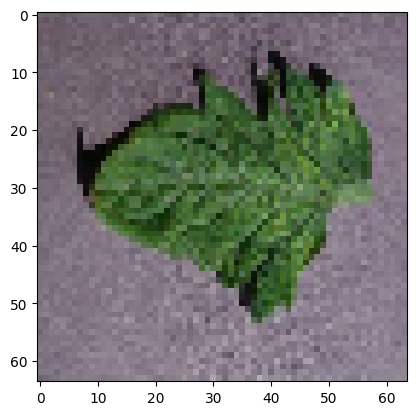

In [88]:
for image_batch, labels_batch in dataset_train.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print('Actual the leaf is :', class_names[first_label])
    prediction = classifier.predict(image_batch)
    print('Prediction of the image is :', class_names[np.argmax(prediction[0])])
    print(first_label, np.argmax(prediction[0]))
    plt.imshow(first_image)